In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #?

import warnings #?
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
!pip install missingno

In [2]:
import missingno as msno #?

In [3]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

In [4]:
#확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#각 feature의 통계치를 반환
df_train.describe()

#PassengerID의 수와 AGE의 수가 다르다. AGE에게 null값이 있는 것?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
columns = df_train.columns

In [7]:
for column in columns :
    #null값의 갯수 / feature의 총 갯수
    print(f'{column} : {df_train[column].isnull().sum() / df_train[column].shape[0]}')
    

PassengerId : 0.0
Survived : 0.0
Pclass : 0.0
Name : 0.0
Sex : 0.0
Age : 0.19865319865319866
SibSp : 0.0
Parch : 0.0
Ticket : 0.0
Fare : 0.0
Cabin : 0.7710437710437711
Embarked : 0.002244668911335578


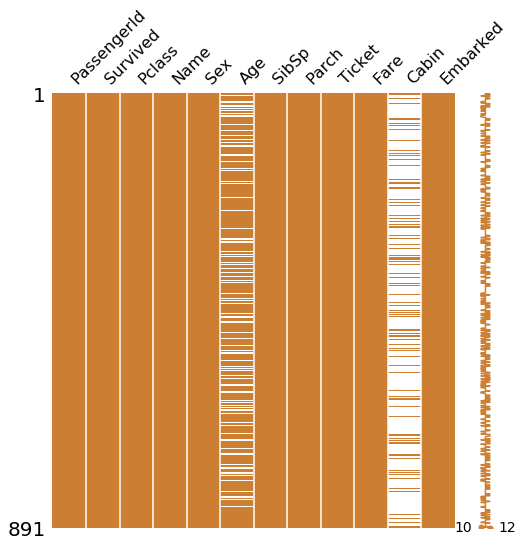

In [8]:
#missingno lib를 사용하면 null의 존재를 시각적으로 확인이 가능?
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

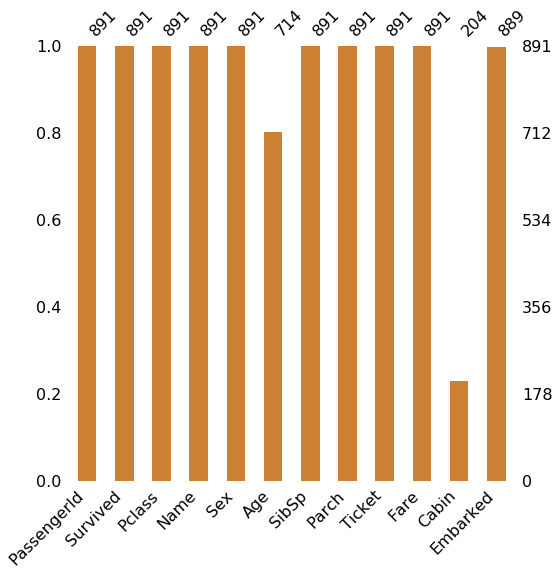

In [9]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

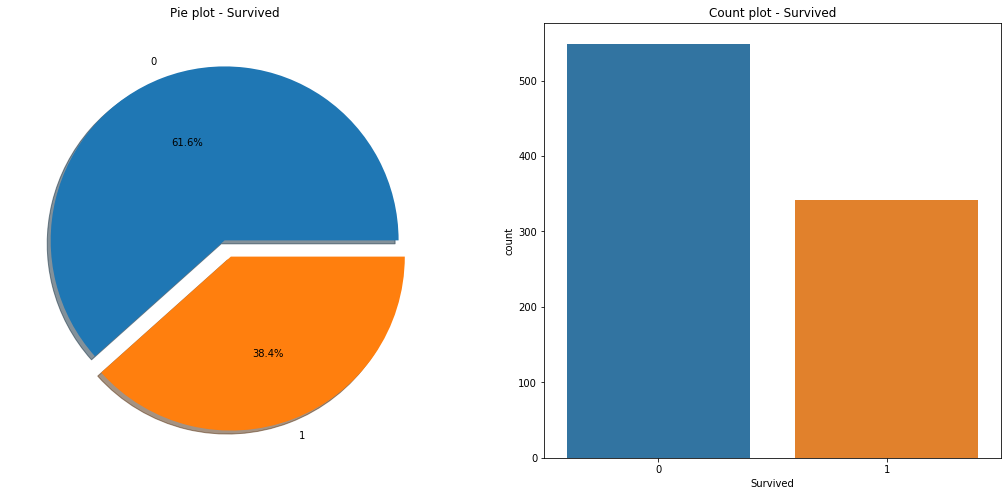

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18,8)) #plot을 한 row에 두 개 그리고 싶을때
#plot pie형태로, autopct 비율만큼 %표시가 얼만지 알수 잇음
#ax[0] 두그림이면 0인덱스의 위치로 옮긴다.

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',
                                            ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') #pie는 보통 비율로 알기 좋음

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived') #실제 갯수를 count해서 보여줌

plt.show()

In [11]:
#Pclass별로 grounpby Pclass 순서마다 Survived feature의 총 갯수를 구한다.
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
#Pclass별로 groupby하여 Pclass 순서마다 Survived=1인 것의 총합을 리턴
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
#crosstab을 이용하면 손쉽게 볼 수 있다.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [14]:
mean=df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()
mean #평균으로 생존률 도출

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


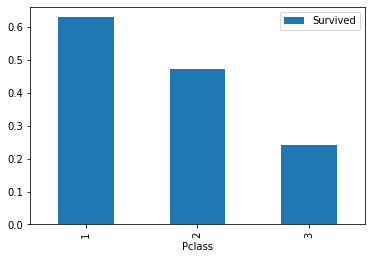

In [15]:
mean.sort_values(by='Survived',ascending=False).plot.bar()

<function matplotlib.pyplot.show(*args, **kw)>

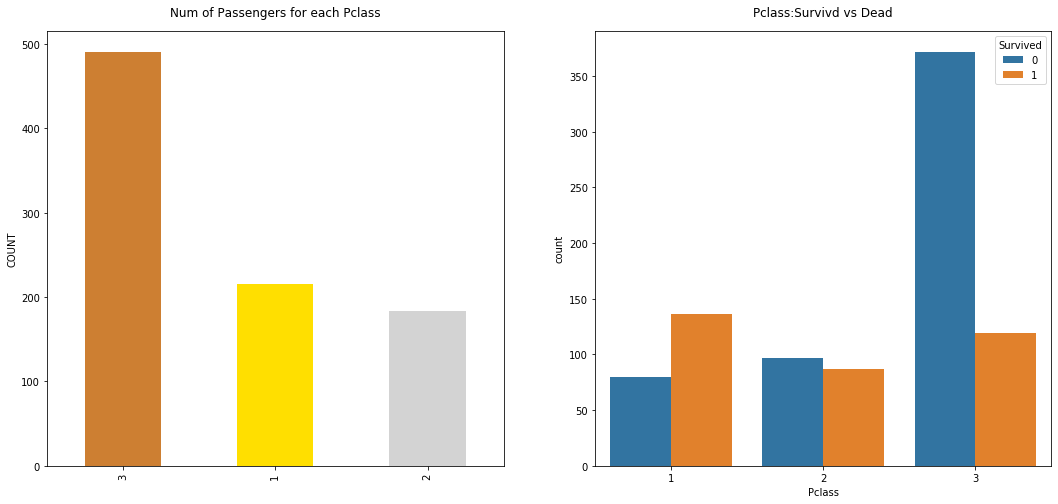

In [16]:
#seaborn의 countplot 이용

y_position=1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],
                                              ax=ax[0])
ax[0].set_title('Num of Passengers for each Pclass',y=y_position)   
ax[0].set_ylabel('COUNT')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survivd vs Dead',y=y_position)

plt.show

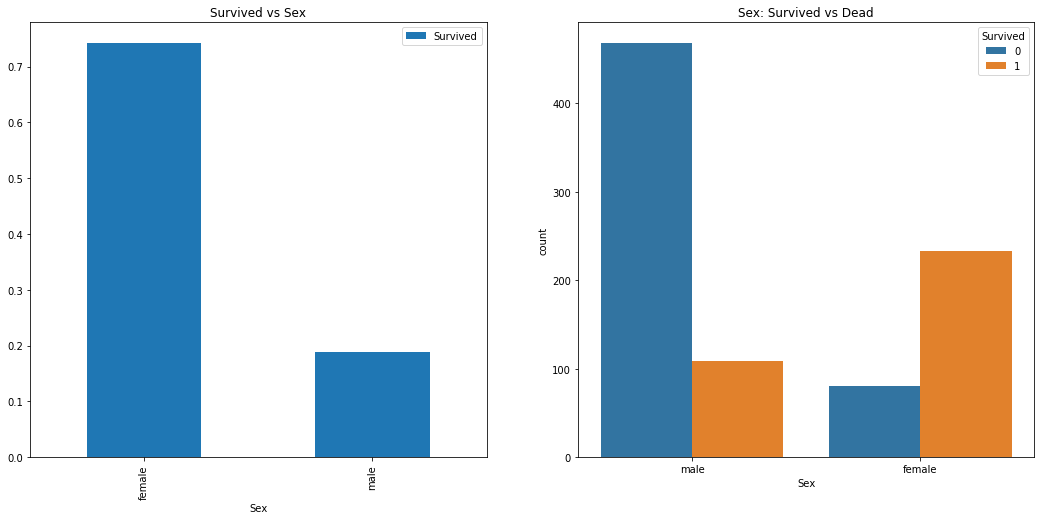

In [17]:
#위 방식대로 sex별로 생존보기
f,ax=plt.subplots(1,2,figsize=(18,8))
mean=df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean()
mean.plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

In [18]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


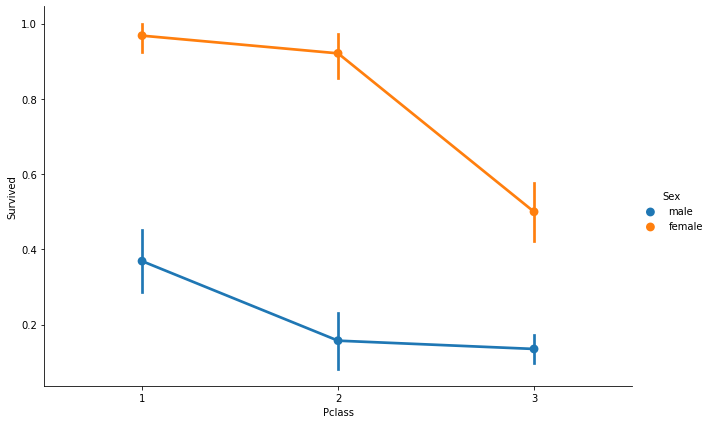

In [20]:
#factorplot 이용하여 sex별 pclass의 survived 정도를 볼 수 있다
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train,
                  size=6,aspect=1.5)

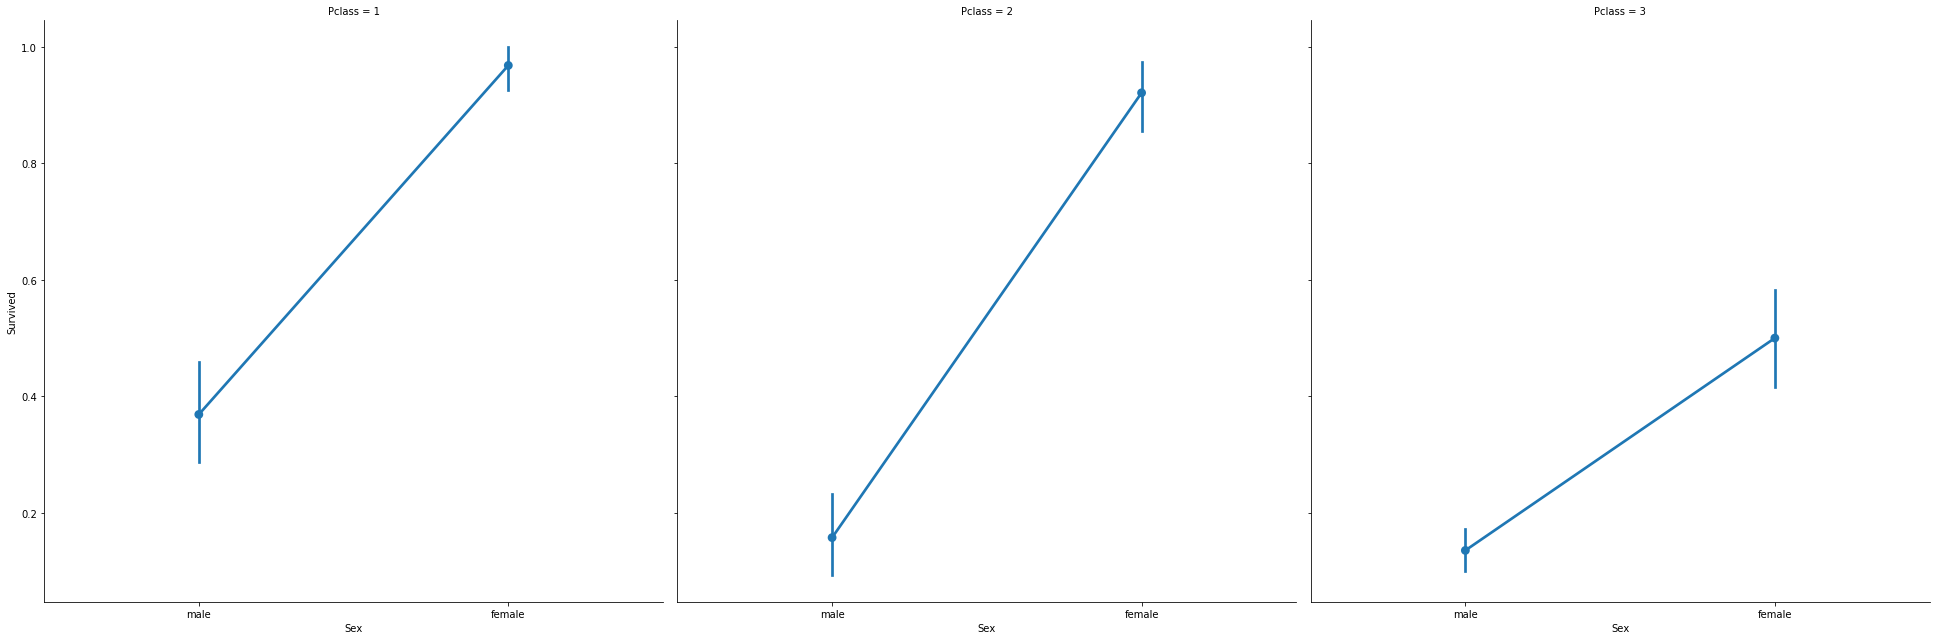

In [21]:
#hue 대신 column
sns.factorplot(x='Sex',y='Survived',col='Pclass', data=df_train,
                  satureation=.5, size=9, aspect=1)

In [22]:
#Age별로
age=df_train['Age']
print(f'max나이:{age.max()}, min나이:{age.min()}, mean나이:{age.mean()}')

max나이:80.0, min나이:0.42, mean나이:29.69911764705882


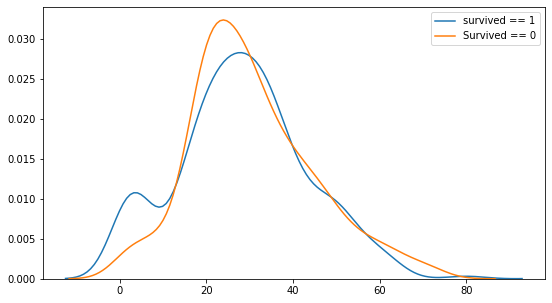

In [23]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['survived == 1', 'Survived == 0'])
plt.show()

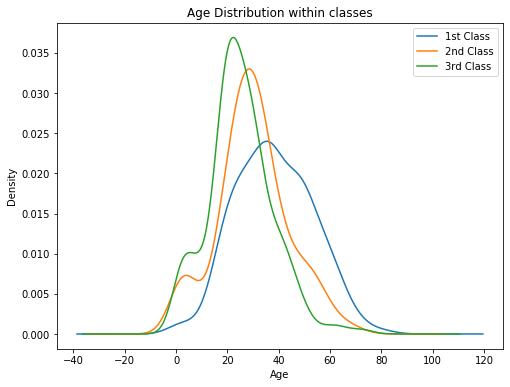

In [24]:
#Age의 기여도
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

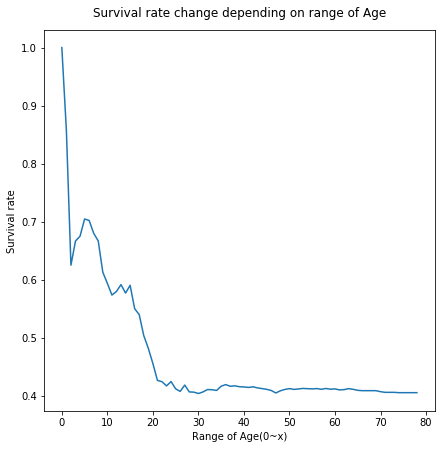

In [25]:
cummulate_survival_ratio=[]
for i in range(1,80) :
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

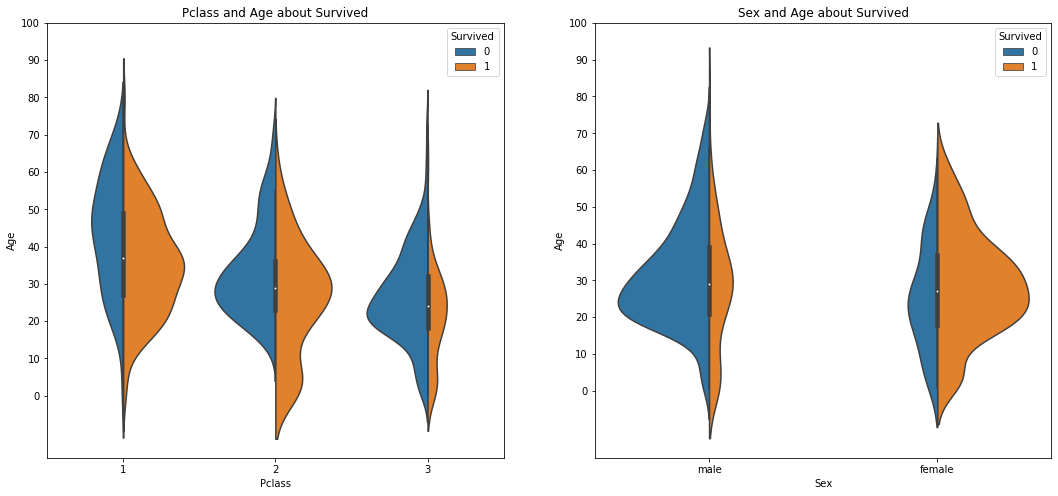

In [26]:
#위의 시각화한 데이터 Sex,Pclass,Age,Survived를 한번에 보고 싶으면?
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age about Survived')
ax[0].set_yticks(range(0,110,10))

#Sex가 x Age가 y
sns.violinplot('Sex','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age about Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [27]:
#Embarked feature
m=df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean()
m

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


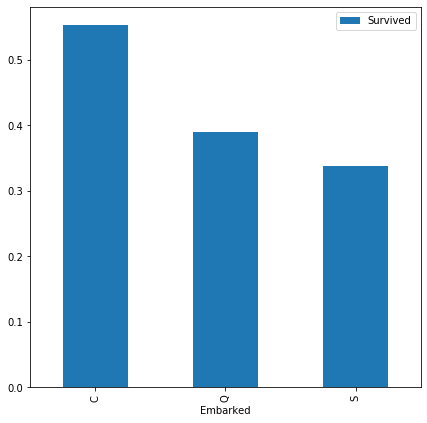

In [28]:
f,ax=plt.subplots(1,1,figsize=(7,7))
m.sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

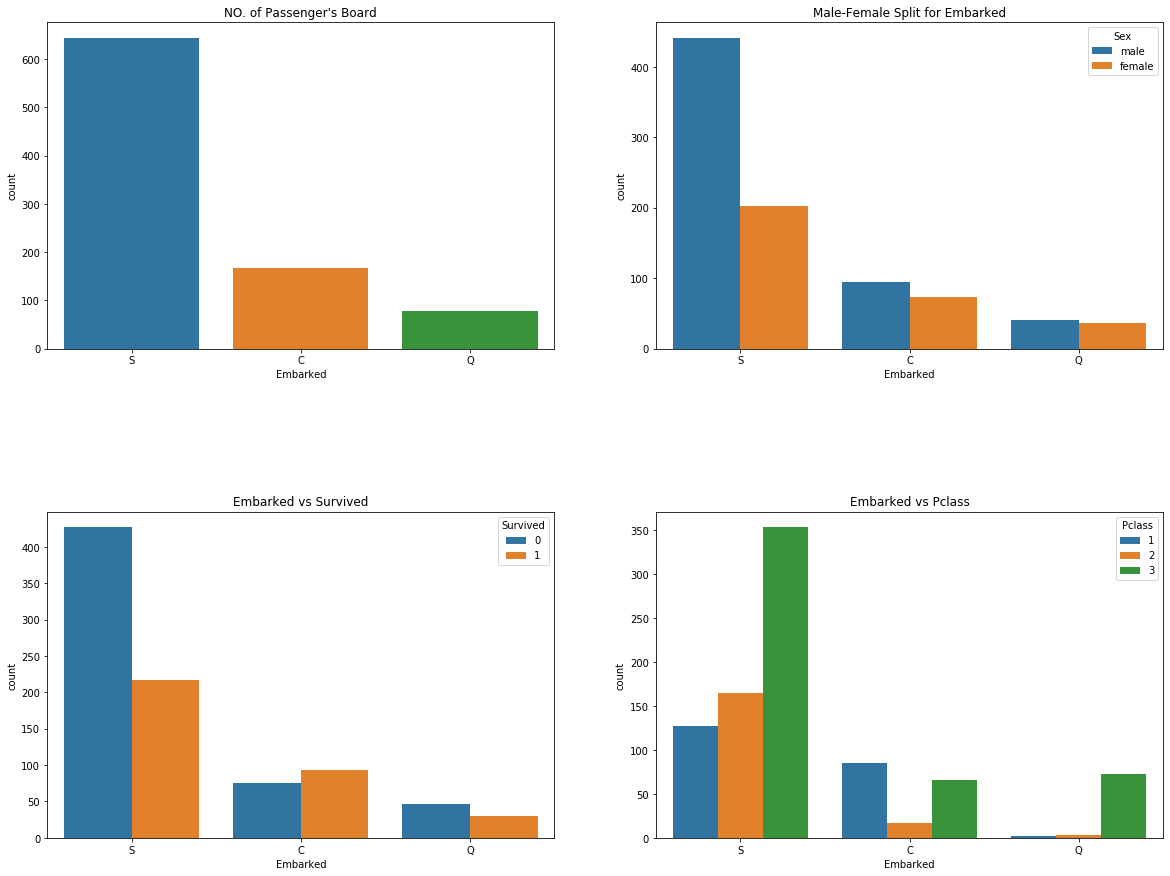

In [29]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train, ax=ax[0,0])
ax[0,0].set_title("NO. of Passenger's Board")
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [30]:
#가족 / 형제 + 부모
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [31]:
print('max of family:',df_train['FamilySize'].max())
print('min of family:',df_train['FamilySize'].min())

max of family: 11
min of family: 1


Text(0.5, 1.02, 'Survived rate depending on FamilySize')

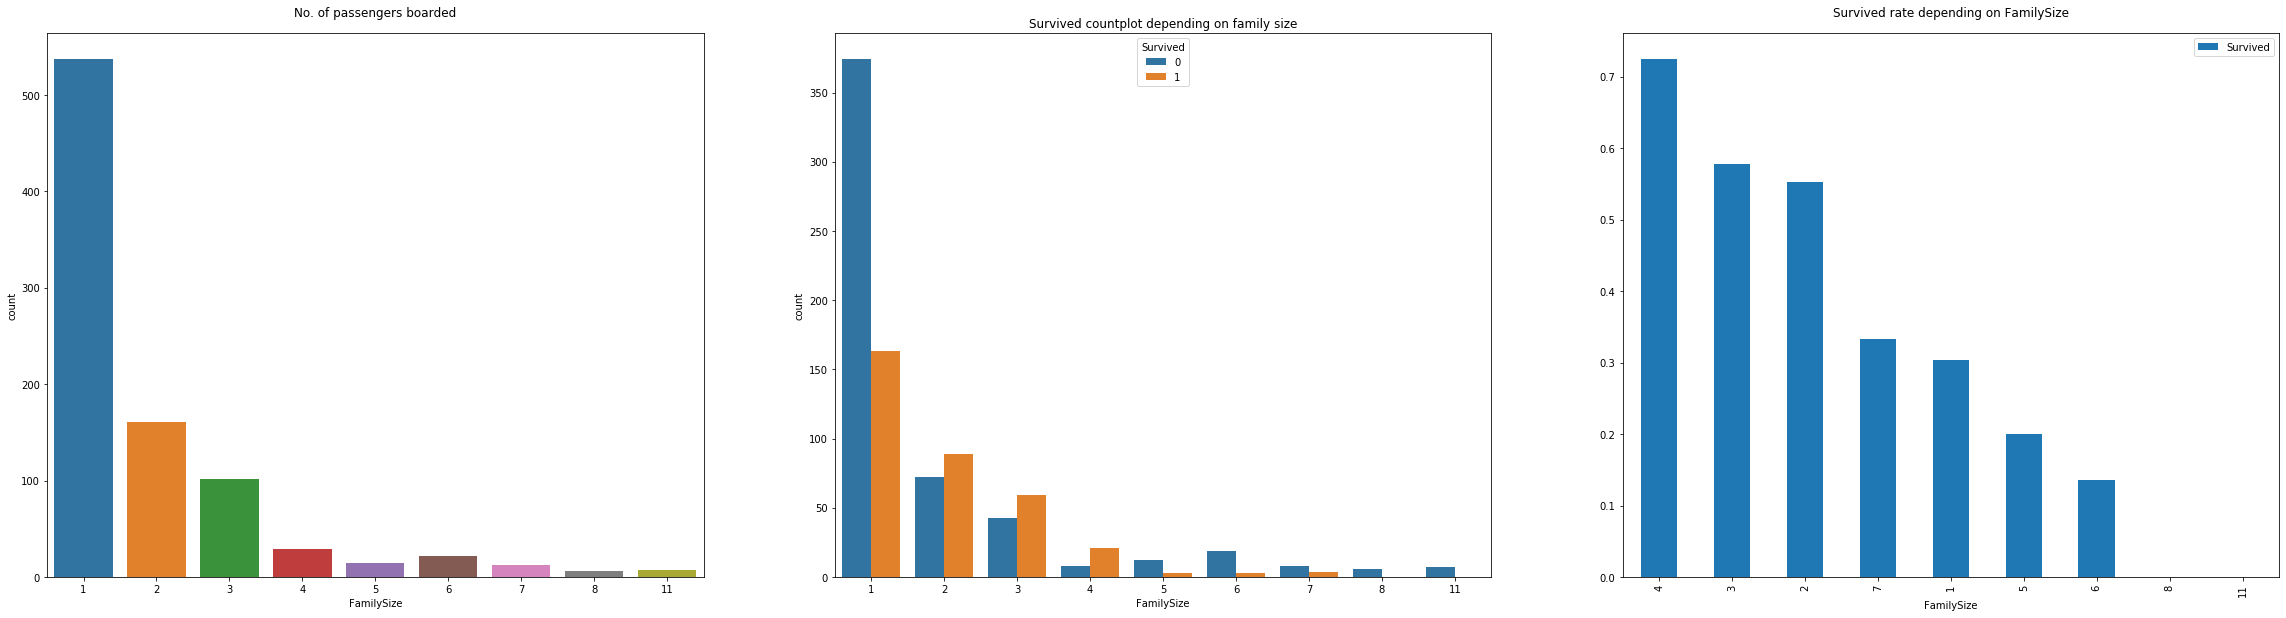

In [32]:
f,ax=plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('No. of passengers boarded', y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived countplot depending on family size')

family_mean=df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean()
family_mean.sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survived rate depending on FamilySize', y=1.02)

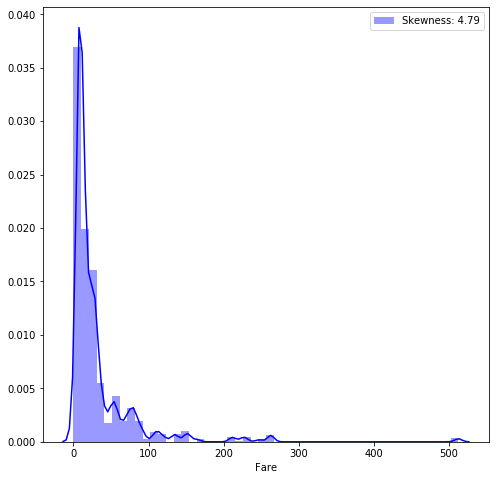

In [33]:
#탑승요금
#히스토그램으로 한번 그려보기
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()) , ax=ax)
g=g.legend(loc='best')

In [49]:
# total_fare = {}
# c=0
# for i in df_train['Fare'] :
#     if i == 0.0 :
#         c+=1
#     if i in total_fare :
#         continue
#     else :
#         total_fare[i]=1
# print(sorted(total_fare))
# print(c)
print(df_train['Fare'].value_counts())

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64


In [45]:
#너무 심하게 두드러지는 부분이 있어 비대칭이 심함
#영향을 줄이기위해 log를 취한다.

# 각 데이터의 값에 log를 취해주기 위한 방법 lamda함수를 이용해 map으로 인수를 넣어줌
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
#df_train['Fare']의 내용물을 map으로 하나씩 i로 꺼내어 log 취함
#이건 i>0일 경우에만 이고 그렇지 않으면 그냥 0으로 만듦

df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

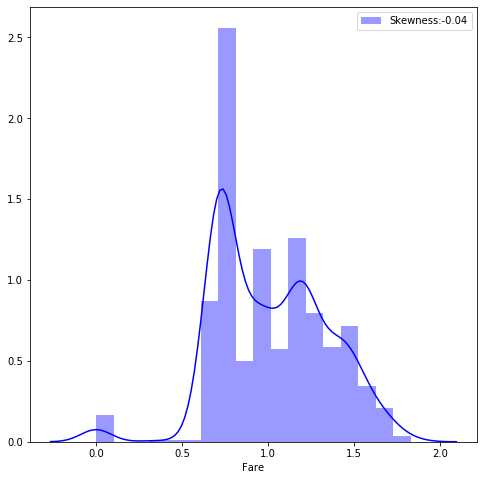

In [47]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train['Fare'], color='b', label='Skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g= g.legend(loc='best')

In [48]:
#Cabin의 null이 가장 많음.
#null이 많으면 정보를 얻기 쉽지 않기 때문에 활용하기보다 
#분석 모델에 null이 들어가지 않도록 함.
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1


In [ ]:
#Ticket feature은 Null 없는게 아닌 모두 값이 존재.
#String으로 된 것은 아이디어 도출로 분석할 필요 -> 응용포인트

#튜토리얼을 끝내고 캐글레이스에 모델을 작성할 때 String을 활용하기.
